<a href="https://colab.research.google.com/github/BouzCS/Sign-Language-Detection/blob/main/Sign_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries & Unzip files

In [1]:
# Let`s import all packages that we may need:
import pandas as pd
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

import glob
import cv2
## for Deep-learing:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import itertools
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout, Flatten

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -FF "drive/My Drive/ISL_CSLRT_Corpus.zip" -O 'fixed.zip'

Streaming output truncated to the last 5000 lines.
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 12.jpg  (7984 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 13.jpg  (7975 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 14.jpg  (7917 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/  (0 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 01.jpg  (103603 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 02.jpg  (104251 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 03.jpg  (104238 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 04.jpg  (105072 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sen

In [ ]:
!unzip /content/fixed.zip

Streaming output truncated to the last 5000 lines.
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 09.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 10.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 11.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 12.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 13.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 14.jpg  
   creating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 01.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentenc

In [3]:
!pip install glob2 tk pathlib datetime tqdm mediapipe

     |████████████████████████████████| 51 kB 343 kB/s 
     |████████████████████████████████| 32.7 MB 1.4 MB/s 
     |████████████████████████████████| 251 kB 34.6 MB/s 


In [ ]:
#!ls -la
#!echo "Hello"
#!bash /content/download_include_data.sh

total 19890276
drwxr-xr-x 1 root root       4096 Apr 14 14:42  .
drwxr-xr-x 1 root root       4096 Apr 14 13:26  ..
-rw-r--r-- 1 root root 8905822924 Jan 22  2021  5de8c65d-30ba-4362-941f-47d61d435aa0
-rw-r--r-- 1 root root 1303983457 Apr  7 03:37 'Adjectives_1of8.zip?download=1'
drwxr-xr-x 1 root root       4096 Apr  8 13:31  .config
-rw-r--r-- 1 root root       1499 Apr 14 14:42  download_include_data.sh
drwxr-xr-x 2 root root       4096 Apr 14 13:39  .ipynb_checkpoints
-rw-r--r-- 1 root root 8905822924 Jan 25  2021  ISL_CSLRT_Corpus
drwxr-xr-x 1 root root       4096 Apr  8 13:32  sample_data
drwxr-xr-x 8 root root       4096 Sep 14  2020  Seasons
-rw-r--r-- 1 root root 1251955665 Apr  7 03:37  Seasons_1of1.zip
Hello
--2022-04-14 14:43:07--  https://zenodo.org/record/4010759/files/Adjectives_1of8.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130398345

In [ ]:

#print('Handedness:', results.multi_handedness)
#print('Handedness:', results.multi_handedness.classification.label)

Handedness: [classification {
  index: 1
  score: 0.9918121695518494
  label: "Right"
}
, classification {
  index: 1
  score: 0.5981738567352295
  label: "Right"
}
]


AttributeError: ignored

Handedness: [classification {
  index: 1
  score: 0.9841282367706299
  label: "Right"
}
, classification {
  index: 0
  score: 0.9870872497558594
  label: "Left"
}
]
WRIST:
x: 0.6532416343688965
y: 0.289009690284729
z: 1.6407676639573765e-07

THUMB_CMC:
x: 0.6426767706871033
y: 0.2625711262226105
z: -0.01152015756815672

THUMB_MCP:
x: 0.6360174417495728
y: 0.22580860555171967
z: -0.0184500589966774

THUMB_IP:
x: 0.6287665367126465
y: 0.1959691047668457
z: -0.024279942736029625

THUMB_TIP:
x: 0.6203632354736328
y: 0.17205949127674103
z: -0.030413318425416946

INDEX_FINGER_MCP:
x: 0.6639817357063293
y: 0.19254440069198608
z: -0.012825502082705498

INDEX_FINGER_PIP:
x: 0.6706984639167786
y: 0.15570855140686035
z: -0.02242710068821907

INDEX_FINGER_DIP:
x: 0.6758034825325012
y: 0.13287408649921417
z: -0.030324235558509827

INDEX_FINGER_TIP:
x: 0.6817261576652527
y: 0.11310915648937225
z: -0.03586464747786522

MIDDLE_FINGER_MCP:
x: 0.6757051944732666
y: 0.20060601830482483
z: -0.01326346769

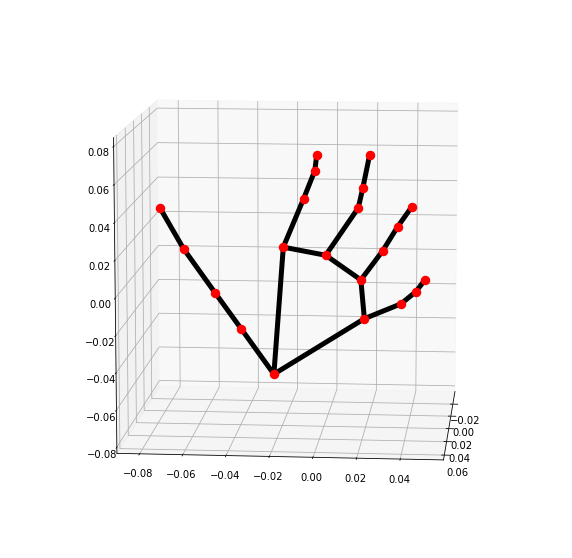

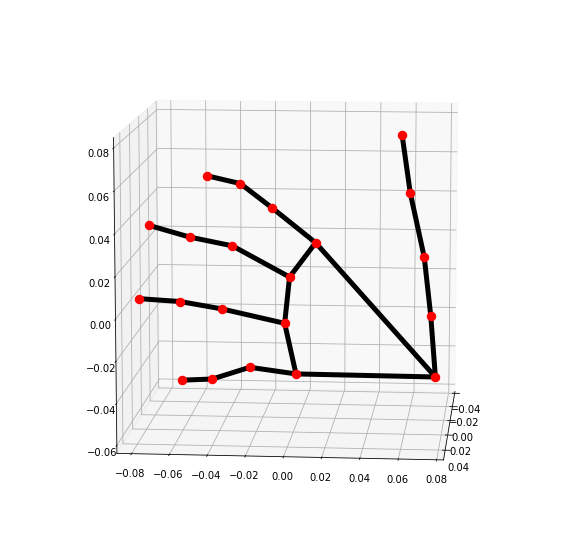

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
global_data = ['/content/ISL_CSLRT_Corpus/Frames_Word_Level/A LOT/A LOT_0_166.jpeg']

# For static images:
IMAGE_FILES = []
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      if results.multi_hand_landmarks:
        for i in range(21):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')
            global_data.append(hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x)
            global_data.append(hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y)
            global_data.append(hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [ ]:
HAND_DICT ={
    '0': "WRIST",
    "1": "THUMB_CMC",
    "2": 'THUMB_MCP',
    "3": 'THUMB_IP',
    "4": 'THUMB_TIP',
    "5": 'INDEX_FINGER_MCP',
    "6": "INDEX_FINGER_PIP",
    "7": 'INDEX_FINGER_DIP',
    "8": "INDEX_FINGER_TIP",
    "9": "MIDDLE_FINGER_MCP",
    "10": "MIDDLE_FINGER_PIP",
    "11": "MIDDLE_FINGER_DIP",
    "12": 'MIDDLE_FINGER_TIP',
    "13": 'RING_FINGER_MCP',
    "14": "RING_FINGER_PIP",
    "15": 'RING_FINGER_DIP',
    "16": "RING_LFINGER_TIP",
    "17": 'PINKY_MCP',
    "18": 'PINKY_PIP',
    "19": "PINKY_DIP",
    "20": "PINKY_TIP"
    }

In [ ]:
dfx = pd.read_excel("/content/ISL_CSLRT_Corpus/corpus_csv_files/ISL_CSLRT_Corpus_word_details.xlsx")
len(dfx['Word'].unique())

114

# Augumentation images dataset

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tqdm

datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = False,
        brightness_range = (0.5, 1.5))

path="/content/ISL_CSLRT_Corpus/Frames_Word_Level"
ii=os.listdir("/content/ISL_CSLRT_Corpus/Frames_Word_Level/")

for file in tqdm.tqdm(glob.glob("/content/ISL_CSLRT_Corpus/Frames_Word_Level/*/*")):
    file_name=file.split("/")[-1]
    base_name=os.path.dirname(file).split("/")[-1]
    img = load_img(path+"/"+base_name+"/"+file_name)  
    x = img_to_array(img) 
    # Reshape the input image 
    x = x.reshape((1, ) + x.shape)  
    i = 0
    # generate 5 new augmented images 
    for batch in datagen.flow(x, batch_size = 1, 
                      save_to_dir ='/content/ISL_CSLRT_Corpus/Frames_Word_Level'+'/'+base_name,  
                      save_prefix = base_name, save_format ='jpeg'):
        i += 1
        if i > 11: 
            break

# Create path dataset

In [ ]:
import glob, os
file_name=[]
base_path=[]
for file in glob.glob("/content/ISL_CSLRT_Corpus/Frames_Word_Level/*/*"):
    
    file_name.append(file.split("/")[-1])
    base_path.append(file)
import pandas as pd

path_data= pd.DataFrame({"file_name":file_name,"base_path":base_path},columns=["file_name","base_path"])


In [ ]:
path_data

,file_name,base_path
0,SORRY_0_2916.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/SO...
1,SORRY_0_3901.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/SO...
2,SORRY_0_7579.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/SO...
3,SORRY_0_3377.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/SO...
4,SORRY_0_3598.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/SO...
...,...,...
13235,HUNGRY_0_9986.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/HU...
13236,HUNGRY_0_5796.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/HU...
13237,HUNGRY_0_4227.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/HU...
13238,HUNGRY_0_7318.jpeg,/content/ISL_CSLRT_Corpus/Frames_Word_Level/HU...


In [ ]:
df.to_csv("final_data_aug.csv")

In [ ]:
!cp /content/Happ/final_data_aug.csv /content/drive/MyDrive

In [ ]:
path_data["base_path"] = path_data['base_path'].astype(str)

In [ ]:
col_one_list = path_data['base_path'].tolist()
#col_one_list = ["\\content\\" + i for i in col_one_list]
#col_one_list = [ i.replace("\\", "/")  for i in col_one_list]

In [ ]:
len(col_one_list)

13240

# Create images dataset

In [ ]:
!pip install tqdm

In [ ]:
import cv2
import pandas as pd
import numpy as np
import mediapipe as mp
import tqdm
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

zero = np.zeros(63)
col = np.load("/content/drive/MyDrive/col(1).npy")
df = pd.DataFrame(columns=col)
col=np.append(col,["label"])
# For static images:

IMAGE_FILES = col_one_list
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.64) as hands:
  for idx, file in tqdm.tqdm(enumerate(IMAGE_FILES)):
    hands_list=[]
    data = np.empty(0)
    label=os.path.dirname(file).split("/")[-1]


    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    try:
      for idx, hand_handedness in enumerate(results.multi_handedness):
        hands_list.append(hand_handedness.classification[0].label)
    except:
        pass
    hand_max_count = max(hands_list.count("Right"), hands_list.count("Left"))
    # Print handedness and draw hand landmarks on the image.
    #print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      if results.multi_hand_landmarks:
            for i in range(21):
              data = np.append(data,hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x)
              data = np.append(data,hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y)
              data = np.append(data,hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z)
      
    if "Right" in hands_list and "Left" in hands_list:
      data = np.concatenate((data,[label]), axis=None)
      df = df.append(pd.DataFrame(data.reshape(1,-1), columns=col))

    elif ("Right" in hands_list and "Left" not in hands_list):
      if hand_max_count==1:
        data = np.concatenate((data, zero), axis=None)
        data = np.concatenate((data,[label]), axis=None)

        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))

      else:
        data = np.concatenate((data[:63], zero), axis=None)
        data = np.concatenate((data,[label]), axis=None)

        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))       

    elif ("Right" not in hands_list and "Left" in hands_list):
      if hand_max_count==1:

        data = np.concatenate((zero, data), axis=None)
        data = np.concatenate((data,[label]), axis=None)

        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))

      else:

        data = np.concatenate((zero, data[:63]), axis=None)
        data = np.concatenate((data,[label]), axis=None)

        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))



      
          



13240it [31:22,  7.03it/s]


In [5]:
df=pd.read_csv("/content/drive/MyDrive/final_data_aug.csv")
df

,Unnamed: 0,R_WRIST_x,R_WRIST_y,R_WRIST_z,R_THUMB_CMC_x,R_THUMB_CMC_y,R_THUMB_CMC_z,R_THUMB_MCP_x,R_THUMB_MCP_y,R_THUMB_MCP_z,...,L_PINKY_PIP_x,L_PINKY_PIP_y,L_PINKY_PIP_z,L_PINKY_DIP_x,L_PINKY_DIP_y,L_PINKY_DIP_z,L_PINKY_TIP_x,L_PINKY_TIP_y,L_PINKY_TIP_z,label
0,0,0.451097,0.514370,1.188836e-07,0.469132,0.487596,0.000110,0.475352,0.455454,-0.000505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
1,1,0.515878,0.540605,1.321693e-07,0.518887,0.506151,-0.006976,0.508161,0.483509,-0.010528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
2,2,0.461494,0.559283,8.450694e-08,0.468477,0.519019,0.000079,0.464193,0.484450,-0.000635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
3,3,0.520546,0.539417,1.704826e-07,0.519644,0.501733,-0.005887,0.505783,0.479929,-0.009033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
4,4,0.468136,0.571441,8.413286e-08,0.463234,0.529842,0.002238,0.452160,0.503096,0.003676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12075,12075,0.633831,0.627656,2.343263e-07,0.616618,0.596139,-0.010197,0.593095,0.581696,-0.017861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY
12076,12076,0.533230,0.773937,2.599143e-07,0.534586,0.724046,-0.014066,0.523717,0.682694,-0.022719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY
12077,12077,0.475212,0.836951,1.282162e-07,0.473822,0.791402,-0.000566,0.459309,0.757602,-0.003369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY
12078,12078,0.577192,0.721748,1.172388e-07,0.558289,0.699846,-0.003462,0.538887,0.699384,-0.006429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY


In [ ]:
df.L_INDEX_FINGER_MCP_z.unique

<bound method Series.unique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12075    0.0
12076    0.0
12077    0.0
12078    0.0
12079    0.0
Name: L_INDEX_FINGER_MCP_z, Length: 12080, dtype: object>

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df_g=pd.read_csv("/content/ISL_CSLRT_Corpus/corpus_csv_files/ISL Corpus sign glosses.csv")
df_g

,Sentence,SIGN GLOSSES
0,are you free today,YOU FREE TODAY
1,are you hiding something,YOU HIDE SOMETHING
2,bring water for me,BRING WATER ME
3,can i help you,I HELP YOU
4,can you repeat that please,YOU REPEAT PLEASE
...,...,...
96,you are good,YOU GOOD
97,you are welcome,YOU WELCOME
98,you can do it,YOU DO IT
99,"you do anything, i do not care","YOU DO ANYTHING, I DO NOT CARE"


In [ ]:
import os.path
def get_parentfolder(path):
  return str(path).split("/")[-2]


In [ ]:
#df["label"] = dfx['Frames path'].apply(lambda x: get_parentfolder(x))
df["label"] = path_data['file_name'].apply(lambda x: get_parentfolder(x))


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df

,R_WRIST_x,R_WRIST_y,R_WRIST_z,R_THUMB_CMC_x,R_THUMB_CMC_y,R_THUMB_CMC_z,R_THUMB_MCP_x,R_THUMB_MCP_y,R_THUMB_MCP_z,R_THUMB_IP_x,...,L_PINKY_PIP_x,L_PINKY_PIP_y,L_PINKY_PIP_z,L_PINKY_DIP_x,L_PINKY_DIP_y,L_PINKY_DIP_z,L_PINKY_TIP_x,L_PINKY_TIP_y,L_PINKY_TIP_z,label
0,0.451097,0.514370,1.188836e-07,0.469132,0.487596,0.000110,0.475352,0.455454,-0.000505,0.473375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
1,0.515878,0.540605,1.321693e-07,0.518887,0.506151,-0.006976,0.508161,0.483509,-0.010528,0.492018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
2,0.461494,0.559283,8.450694e-08,0.468477,0.519019,0.000079,0.464193,0.484450,-0.000635,0.453978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
3,0.520546,0.539417,1.704826e-07,0.519644,0.501733,-0.005887,0.505783,0.479929,-0.009033,0.487484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
4,0.468136,0.571441,8.413286e-08,0.463234,0.529842,0.002238,0.452160,0.503096,0.003676,0.437428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SORRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12075,0.633831,0.627656,2.343263e-07,0.616618,0.596139,-0.010197,0.593095,0.581696,-0.017861,0.571217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY
12076,0.533230,0.773937,2.599143e-07,0.534586,0.724046,-0.014066,0.523717,0.682694,-0.022719,0.509977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY
12077,0.475212,0.836951,1.282162e-07,0.473822,0.791402,-0.000566,0.459309,0.757602,-0.003369,0.443167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY
12078,0.577192,0.721748,1.172388e-07,0.558289,0.699846,-0.003462,0.538887,0.699384,-0.006429,0.521990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUNGRY


In [ ]:
!pip install np_utils

     |████████████████████████████████| 61 kB 446 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=005d6d298af75aea2ab5ab7f37cf69af5b92d643c115b3d5b1cf970b48485d42
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


#MLP Classifier

In [ ]:

# define dataset
X=df.drop("label",axis=1)
y= df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score

GRID = [
    {
     'solver': ['adam'],
     'learning_rate_init': [0.0001],
     'max_iter': [2000],
     'hidden_layer_sizes': [(500, 400, 300, 200, 100)],
     'activation': ['relu'],
     'alpha': [0.0001],
     }
]


model=MLPClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=GRID,
                            n_jobs=-1, cv=2, refit=True, verbose=3, 
                            return_train_score=False)

grid_search.fit(X_train, y_train)
prediction = grid_search.predict(X_test)


%time


Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [ ]:

print(grid_search.best_params_)
print('Score of best mlp_classifier :\t{}'.format(grid_search.score(X_test, y_test)))
print(classification_report(y_test, prediction))

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (500, 400, 300, 200, 100), 'learning_rate_init': 0.0001, 'max_iter': 2000, 'solver': 'adam'}
Score of best mlp_classifier :	0.6112365186857286
                 precision    recall  f1-score   support

          A LOT       0.50      0.38      0.43        16
          ABUSE       0.74      0.67      0.70        21
         AFRAID       0.88      0.65      0.75        23
          AGREE       0.68      0.79      0.73        29
            ALL       0.29      0.13      0.18        15
          ANGRY       0.78      0.83      0.80        47
       ANYTHING       0.53      0.59      0.56        17
     APPRECIATE       0.39      0.43      0.41        21
            BAD       0.62      0.64      0.63        28
      BEAUTIFUL       0.62      0.40      0.48        20
         BECOME       0.30      0.30      0.30        23
            BED       0.50      0.42      0.46        19
          BORED       0.65      0.63      0.64       

In [ ]:
import pickle
# now you can save it to a file
with open('mlpclf.pkl', 'wb') as f:
    pickle.dump(grid_search, f)
%time
# and later you can load it
#with open('filename.pkl', 'rb') as f:
#    clf = pickle.load(f)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.54 µs


In [ ]:
!cp /content/mlpclf.pkl /content/drive/MyDrive/

# XGB Classifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:
params = {
        'min_child_weight': [5, 10],
        'gamma': [0.5,1.5,5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softmax',
                    silent=True, nthread=1)


folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
random_search.fit(X_train, y_train)

%time

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
prediction = random_search.predict(X_test)
print('Score of best mlp_classifier :\t{}'.format(random_search.score(X_test, y_test)))
print(classification_report(y_test, prediction))

In [ ]:
# example of manually specifying the loss function for binary classification
from sklearn.model_selection import train_test_split, cross_val_predict
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score 

# define dataset
X=df.drop("label",axis=1)
y= df['label']
# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='multi:softmax')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# fit the model
xgb_pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('xgb', xgb_estimator) 
    ])
xgb_pipe.fit(X_train, y_train)
# summarize the model loss function
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, xgb_pipe.predict(X_test))*100))
%time

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, xgb_pipe.predict(X_test))*100))


Accuracy on test data: 63.1%


In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100,objective='multi:softmax')
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)
xgb_model.fit(train_X, train_y)
preds = xgb_model.predict(test_X)
acc_xgb = (preds == test_y).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


In [9]:
!git clone https://github.com/philipperemy/keras-attention-mechanism

Cloning into 'keras-attention-mechanism'...
remote: Enumerating objects: 365, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 365 (delta 65), reused 63 (delta 27), pack-reused 243
Receiving objects: 100% (365/365), 4.15 MiB | 28.51 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [10]:
!mv /content/keras-attention-mechanism/attention /content/

In [11]:


from tensorflow.python.keras.layers import LSTM
from attention import Attention
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import Conv2D, LSTM
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam



In [7]:
Y = pd.get_dummies(df['label']).values
X=df.drop("label",axis=1)

Y.shape

(12080, 114)

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)


In [13]:
train_X=train_X.to_numpy()
test_X=test_X.to_numpy()

In [14]:
126/3

42.0

In [15]:
train_X=train_X.reshape(train_X.shape[0],42,3)
test_X=test_X.reshape(test_X.shape[0],42,3)

In [16]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
model = Sequential()
model.add(LSTM(126, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))
# Fourth LSTM layer
model.add(LSTM(70, return_sequences=True))
#model.add(Dropout(0.3))
# The output layer
model.add(LSTM(units=50))
#model.add(Dropout(0.2))
model.add(Dense(114, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model.compile(optimizer='adam',loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:

from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=7, verbose=2)

# fit network
history = model.fit(train_X, train_y, epochs=120, batch_size=32, validation_data=(test_X, test_y), verbose=2, callbacks=[callback], shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

KeyboardInterrupt: ignored

# 1DCNN

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

In [51]:
# BUILD 1D CNN LAYERS
model = Sequential()
model.add(Conv1D(84, kernel_size=(20), activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Conv1D(140, kernel_size=(20),activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=(4)))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(114, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 23, 84)            5124      
                                                                 
 conv1d_39 (Conv1D)          (None, 4, 140)            235340    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 1, 140)           0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 140)               0         
                                                                 
 dense_23 (Dense)            (None, 512)               72192     
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                     

In [48]:



from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_acc', mode='max', verbose=2, patience=3)
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath='models_cnn.hdf5')]
callback = EarlyStopping(monitor='loss', patience=30, verbose=2)

# fit network
history = model.fit(train_X, train_y, epochs=1200, batch_size=64, validation_data=(test_X, test_y), verbose=2, callbacks=[checkpoint,callback], shuffle=False)

# summarize history for loss

Epoch 1/1200
151/151 - 18s - loss: 4.4479 - accuracy: 0.0957 - val_loss: 4.2757 - val_accuracy: 0.0940 - 18s/epoch - 119ms/step
Epoch 2/1200
151/151 - 17s - loss: 4.1795 - accuracy: 0.1179 - val_loss: 4.1449 - val_accuracy: 0.1296 - 17s/epoch - 111ms/step
Epoch 3/1200
151/151 - 19s - loss: 3.9579 - accuracy: 0.1639 - val_loss: 3.8679 - val_accuracy: 0.1635 - 19s/epoch - 126ms/step
Epoch 4/1200
151/151 - 17s - loss: 3.7673 - accuracy: 0.1756 - val_loss: 3.7313 - val_accuracy: 0.1689 - 17s/epoch - 110ms/step
Epoch 5/1200
151/151 - 17s - loss: 3.6589 - accuracy: 0.1805 - val_loss: 3.6061 - val_accuracy: 0.1796 - 17s/epoch - 111ms/step
Epoch 6/1200
151/151 - 17s - loss: 3.5709 - accuracy: 0.1863 - val_loss: 3.5173 - val_accuracy: 0.1834 - 17s/epoch - 111ms/step
Epoch 7/1200
151/151 - 17s - loss: 3.4643 - accuracy: 0.1957 - val_loss: 3.4271 - val_accuracy: 0.1958 - 17s/epoch - 111ms/step
Epoch 8/1200
151/151 - 17s - loss: 3.3878 - accuracy: 0.2041 - val_loss: 3.3717 - val_accuracy: 0.2016 -

KeyboardInterrupt: ignored

In [50]:
model.evaluate(test_X, test_y, batch_size=32)

76/76 [==============================] - 1s 6ms/step - loss: 4.8411 - accuracy: 0.0103


[4.841120719909668, 0.010347682051360607]

In [ ]:
!cp /content/models_cnn.hdf5 /content/drive/MyDrive

In [69]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)


In [ ]:
train_X=train_X.to_numpy()
test_X=test_X.to_numpy()

In [72]:
train_X.shape

(9664, 42, 3)

In [71]:
train_X=train_X.reshape(train_X.shape[0],42,3)
test_X=test_X.reshape(test_X.shape[0],42,3)

ValueError: ignored

In [76]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(3), activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Conv1D(64, (3), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.2))

model.add(Conv1D(32, kernel_size=(3), activation='relu'))
model.add(Conv1D(128, (3), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(114, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_47 (Conv1D)          (None, 40, 32)            320       
                                                                 
 conv1d_48 (Conv1D)          (None, 38, 64)            6208      
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 19, 64)           0         
 g1D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 19, 64)            0         
                                                                 
 conv1d_49 (Conv1D)          (None, 17, 32)            6176      
                                                                 
 conv1d_50 (Conv1D)          (None, 15, 128)           12416     
                                                     

In [77]:



from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_acc', mode='max', verbose=2, patience=3)
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath='models_cnntry.hdf5')]
callback = EarlyStopping(monitor='loss', patience=30, verbose=2)

# fit network
history = model.fit(train_X, train_y, epochs=1200, batch_size=64, validation_data=(test_X, test_y), verbose=2, callbacks=[checkpoint,callback], shuffle=False)

# summarize history for loss

Epoch 1/1200
151/151 - 7s - loss: 4.2081 - accuracy: 0.1223 - val_loss: 3.9476 - val_accuracy: 0.1544 - 7s/epoch - 47ms/step
Epoch 2/1200
151/151 - 4s - loss: 3.7723 - accuracy: 0.1700 - val_loss: 3.6632 - val_accuracy: 0.1751 - 4s/epoch - 25ms/step
Epoch 3/1200
151/151 - 4s - loss: 3.5694 - accuracy: 0.1842 - val_loss: 3.5354 - val_accuracy: 0.1763 - 4s/epoch - 25ms/step
Epoch 4/1200
151/151 - 4s - loss: 3.4015 - accuracy: 0.1977 - val_loss: 3.3161 - val_accuracy: 0.2028 - 4s/epoch - 25ms/step
Epoch 5/1200
151/151 - 4s - loss: 3.1616 - accuracy: 0.2239 - val_loss: 3.0904 - val_accuracy: 0.2409 - 4s/epoch - 25ms/step
Epoch 6/1200
151/151 - 4s - loss: 2.8948 - accuracy: 0.2644 - val_loss: 2.8041 - val_accuracy: 0.2885 - 4s/epoch - 25ms/step
Epoch 7/1200
151/151 - 4s - loss: 2.6346 - accuracy: 0.3107 - val_loss: 2.5604 - val_accuracy: 0.3427 - 4s/epoch - 25ms/step
Epoch 8/1200
151/151 - 4s - loss: 2.4271 - accuracy: 0.3449 - val_loss: 2.4290 - val_accuracy: 0.3605 - 4s/epoch - 25ms/step


In [78]:
model.evaluate(test_X, test_y, batch_size=32)

76/76 [==============================] - 0s 5ms/step - loss: 1.4359 - accuracy: 0.8249


[1.4358922243118286, 0.824917197227478]

In [79]:
!cp /content/models_cnntry.hdf5 /content/drive/MyDrive

# Neural network model

In [ ]:
# Neural network model
input_shape = (train_X.shape[1], train_X.shape[2])
optimizer = Adam(0.005, beta_1=0.1, beta_2=0.001, amsgrad=True)
n_classes = 114

model = Sequential()
model.add(Bidirectional(LSTM(126, return_sequences=True), input_shape=input_shape))
model.add(Bidirectional(LSTM(126, return_sequences=True)))
model.add(Attention(126))
model.add(Dense(4*126))
model.add(Dense(4*126))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [ ]:


from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_acc', mode='max', verbose=2, patience=3)
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath='models.hdf5')]

# Train model
hist = model.fit(train_X,
          train_y,
          batch_size=256,
          epochs=50,
          validation_data=(test_X, test_y),
          callbacks = [es,checkpoint])



Epoch 1/50
38/38 [==============================] - 147s 4s/step - loss: 5.0875 - acc: 0.0972 - val_loss: 4.2234 - val_acc: 0.1171
Epoch 2/50
38/38 [==============================] - 125s 3s/step - loss: 4.2031 - acc: 0.0991 - val_loss: 4.1685 - val_acc: 0.0960
Epoch 3/50
38/38 [==============================] - 126s 3s/step - loss: 4.1504 - acc: 0.1128 - val_loss: 4.1817 - val_acc: 0.0919
Epoch 4/50
38/38 [==============================] - 130s 3s/step - loss: 4.1032 - acc: 0.1142 - val_loss: 4.0738 - val_acc: 0.1403
Epoch 5/50
38/38 [==============================] - 126s 3s/step - loss: 4.0580 - acc: 0.1269 - val_loss: 4.2042 - val_acc: 0.0989
Epoch 6/50
38/38 [==============================] - 127s 3s/step - loss: 4.0146 - acc: 0.1241 - val_loss: 3.9850 - val_acc: 0.1225
Epoch 7/50
38/38 [==============================] - 124s 3s/step - loss: 3.9995 - acc: 0.1311 - val_loss: 3.9734 - val_acc: 0.1457
Epoch 8/50
38/38 [==============================] - 124s 3s/step - loss: 3.9409 - a

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()

knn_pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier()) 
    ])

knn_param = {
        'knn__n_neighbors': [1,7], # usually odd numbers
        'knn__weights': ['uniform'],
        'knn__algorithm':['auto'],
        'knn__leaf_size':[10,20],
        'knn__p':[2,6,10]
    }

grid_knn = GridSearchCV(knn_pipe, 
                    param_grid = knn_param, 
                    n_jobs = -1, 
                    cv = 5,
                    refit = "accuracy_score",
                    verbose=3)

grid_knn.fit(X_train, y_train)


In [ ]:

prediction_knn = grid_knn.predict(X_test)

print(grid_knn.best_params_)
print('Score of best mlp_classifier :\t{}'.format(grid_knn.score(X_test, y_test)))
print(classification_report(y_test, prediction_knn))

{'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}
Score of best mlp_classifier :	0.7839403973509934
                 precision    recall  f1-score   support

          A LOT       0.89      0.73      0.80        11
          ABUSE       1.00      0.81      0.90        16
         AFRAID       0.93      0.81      0.87        16
          AGREE       0.89      0.89      0.89        18
            ALL       0.60      0.67      0.63         9
          ANGRY       0.93      0.86      0.89        29
       ANYTHING       0.85      1.00      0.92        11
     APPRECIATE       0.56      0.56      0.56         9
            BAD       0.95      0.90      0.92        20
      BEAUTIFUL       0.90      0.60      0.72        15
         BECOME       0.73      0.73      0.73        11
            BED       0.46      0.67      0.55         9
          BORED       0.81      0.76      0.79        17
          BRING       0.71      0.75   

In [ ]:
knn_model = KNeighborsClassifier()

knn_pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier()) 
    ])

knn_param = {
        'knn__n_neighbors': [1,7], # usually odd numbers
        'knn__weights': ['uniform'],
        'knn__algorithm':['auto'],
        'knn__leaf_size':[10,20],
        'knn__p':[2,6,10]
    }

grid_knn = GridSearchCV(knn_pipe, 
                    param_grid = knn_param, 
                    n_jobs = -1, 
                    cv = 5,
                    refit = "accuracy_score",
                    verbose=3)

grid_knn.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:

prediction_knn = clf.predict(X_test)

#print(grid_knn.best_params_)
print('Score of best mlp_classifier :\t{}'.format(clf.score(X_test, y_test)))
print(classification_report(y_test, prediction_knn))

Score of best mlp_classifier :	0.7692500627037873
                 precision    recall  f1-score   support

          A LOT       0.91      0.62      0.74        16
          ABUSE       0.62      0.71      0.67        21
         AFRAID       0.91      0.87      0.89        23
          AGREE       0.81      0.72      0.76        29
            ALL       0.63      0.80      0.71        15
          ANGRY       0.91      0.85      0.88        47
       ANYTHING       0.78      0.82      0.80        17
     APPRECIATE       0.78      0.67      0.72        21
            BAD       0.85      0.79      0.81        28
      BEAUTIFUL       0.68      0.65      0.67        20
         BECOME       0.82      0.78      0.80        23
            BED       0.53      0.53      0.53        19
          BORED       0.90      0.70      0.79        27
          BRING       0.88      0.82      0.85        34
           CHAT       0.74      0.78      0.76        18
          CLASS       0.95      0.90 

In [ ]:

print('Score of best knn_classifier :\t{}'.format(grid_knn.score(X_test, y_test)))
print(classification_report(y_test, prediction_knn))

In [ ]:
import pickle
# now you can save it to a file
%time
# and later you can load it
with open('/content/knnclf.pkl', 'rb') as f:
    clf = pickle.load(f)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


In [ ]:
!cp /content/knnclf.pkl /content/drive/MyDrive/

In [ ]:
!git clone https://github.com/albertbup/deep-belief-network.git

Cloning into 'deep-belief-network'...
remote: Enumerating objects: 795, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 795 (delta 13), reused 6 (delta 2), pack-reused 763
Receiving objects: 100% (795/795), 181.30 KiB | 12.95 MiB/s, done.
Resolving deltas: 100% (459/459), done.


In [ ]:
!mv /content/deep-belief-network/dbn /content/

In [ ]:
from dbn import SupervisedDBNClassification
classifier = SupervisedDBNClassification(hidden_layers_structure=[1024, 1024],
                                         learning_rate_rbm=0.0005,
                                         learning_rate=0.0001,
                                         n_epochs_rbm=90,
                                         n_iter_backprop=1200,
                                         batch_size=256,
                                         activation_function='relu',
                                         dropout_p=0)

classifier.fit(X_train, y_train)

# Save the model
classifier.save('model.pkl')

# Restore it
classifier = SupervisedDBNClassification.load('model.pkl')

# Test
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(y_test, Y_pred))

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 12.710703
>> Epoch 2 finished 	RBM Reconstruction error 11.419427
>> Epoch 3 finished 	RBM Reconstruction error 9.869273
>> Epoch 4 finished 	RBM Reconstruction error 8.120402
>> Epoch 5 finished 	RBM Reconstruction error 6.368002
>> Epoch 6 finished 	RBM Reconstruction error 4.898584
>> Epoch 7 finished 	RBM Reconstruction error 3.917170
>> Epoch 8 finished 	RBM Reconstruction error 3.381687
>> Epoch 9 finished 	RBM Reconstruction error 3.106225
>> Epoch 10 finished 	RBM Reconstruction error 2.939787
>> Epoch 11 finished 	RBM Reconstruction error 2.806249
>> Epoch 12 finished 	RBM Reconstruction error 2.680652
>> Epoch 13 finished 	RBM Reconstruction error 2.554642
>> Epoch 14 finished 	RBM Reconstruction error 2.426786
>> Epoch 15 finished 	RBM Reconstruction error 2.296933
>> Epoch 1 finished 	RBM Reconstruction error 12.148567
>> Epoch 2 finished 	RBM Reconstruction error 11.702609
>> Epoch 3 finished 	RBM Rec

In [ ]:
from sklearn.metrics import accuracy_score 
print('Done.\nAccuracy: %f' % accuracy_score(y_test, Y_pred))


Done.
Accuracy: 0.200401


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


In [ ]:
type(X_train)

numpy.ndarray